In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.columns = ['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate',
       'Exercise_Indused_Angina', 'Oldpeak', 'Slope', 'Major_Vessels', 'Thalassemia', 'Target']

In [4]:
df.shape

(1025, 14)

In [5]:
df.duplicated().sum()

723

In [6]:
df = df.drop_duplicates()

In [7]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate', 'Exercise_Indused_Angina', 'Oldpeak', 'Slope',
       'Major_Vessels', 'Thalassemia', 'Target'],
      dtype='object')

In [8]:
df.isnull().sum()

Age                        0
Gender                     0
Chest_Pain                 0
Resting_Blood_Pressure     0
Serum_Cholesterol          0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_Heart_Rate             0
Exercise_Indused_Angina    0
Oldpeak                    0
Slope                      0
Major_Vessels              0
Thalassemia                0
Target                     0
dtype: int64

In [9]:
df.dtypes

Age                          int64
Gender                       int64
Chest_Pain                   int64
Resting_Blood_Pressure       int64
Serum_Cholesterol            int64
Fasting_Blood_Sugar          int64
Resting_ECG                  int64
Max_Heart_Rate               int64
Exercise_Indused_Angina      int64
Oldpeak                    float64
Slope                        int64
Major_Vessels                int64
Thalassemia                  int64
Target                       int64
dtype: object

In [10]:
df.nunique()

Age                         41
Gender                       2
Chest_Pain                   4
Resting_Blood_Pressure      49
Serum_Cholesterol          152
Fasting_Blood_Sugar          2
Resting_ECG                  3
Max_Heart_Rate              91
Exercise_Indused_Angina      2
Oldpeak                     40
Slope                        3
Major_Vessels                5
Thalassemia                  4
Target                       2
dtype: int64

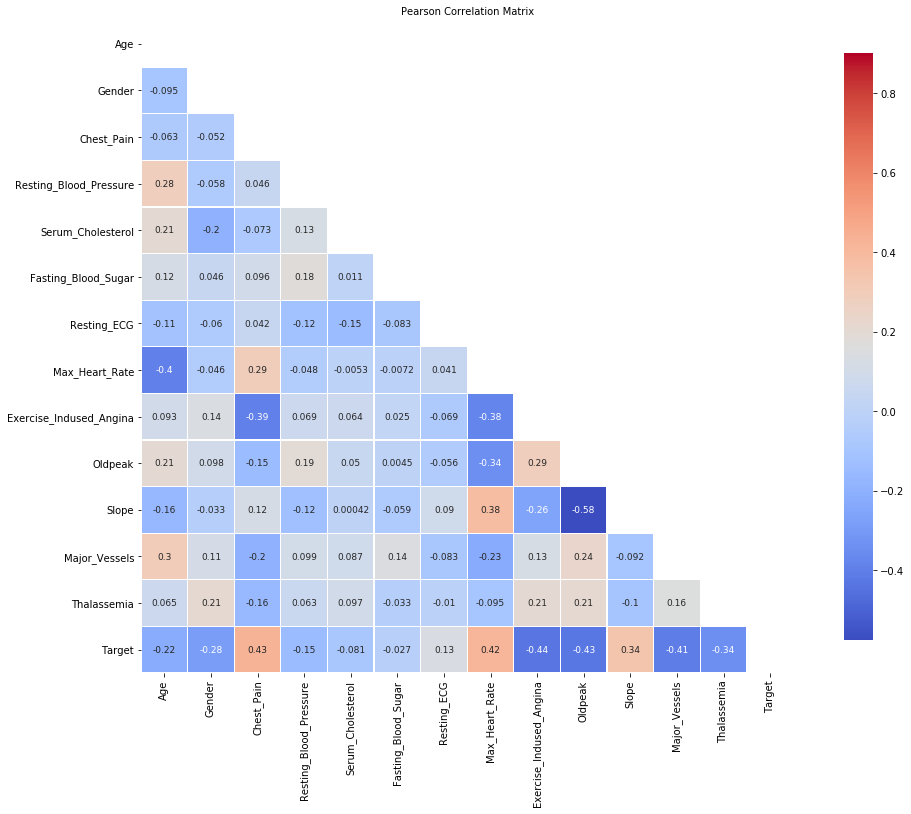

In [11]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

## Start with Target Variable - Heart Disease
## 0 = No Disease, 1 = Disease
---angiographic disease status

In [12]:
# For Visualization Purposes
df['Heart_Disease'] = np.where(df['Target'] == 0,'Healthy Heart','Heart Disease')

In [13]:
#Default Count
print('Target Variable')
print(df.groupby(['Heart_Disease']).Heart_Disease.count())

Target Variable
Heart_Disease
Healthy Heart    138
Heart Disease    164
Name: Heart_Disease, dtype: int64


In [14]:
#Percentages 
print("Percent without Disease")
print((df.groupby(['Heart_Disease']).Heart_Disease.count()[0]/df.groupby(['Heart_Disease']).Heart_Disease.count().sum()))
print("Percent with Disease")
print((df.groupby(['Heart_Disease']).Heart_Disease.count()[1]/df.groupby(['Heart_Disease']).Heart_Disease.count().sum()))

# Seems to be somewhat Balanced dataset

Percent without Disease
0.45695364238410596
Percent with Disease
0.543046357615894


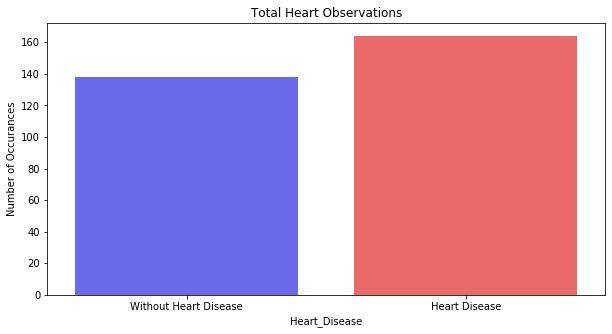

In [15]:
#Target Variable Countplot
plt.figure(figsize = (10,5))
sns.countplot(df['Heart_Disease'], palette="seismic")
plt.title('Total Heart Observations')
plt.ylabel('Number of Occurances')
plt.xticks(np.arange(2), ['Without Heart Disease','Heart Disease'])
plt.show()

## Independant Variable 1 : Age

In [16]:
df.Age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: Age, dtype: float64

In [17]:
#for colname in categorical:
#df['Gender'] = df['Gender'].astype(object)

In [18]:
df.Gender.describe()

count    302.000000
mean       0.682119
std        0.466426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64

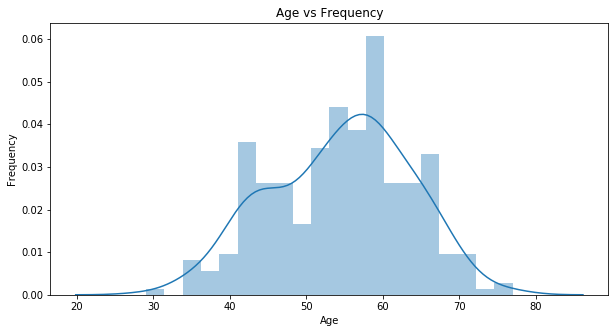

In [19]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df.Age,kde=True, bins=20);
ax.set(xlabel='Age', ylabel='Frequency', title='Age vs Frequency');

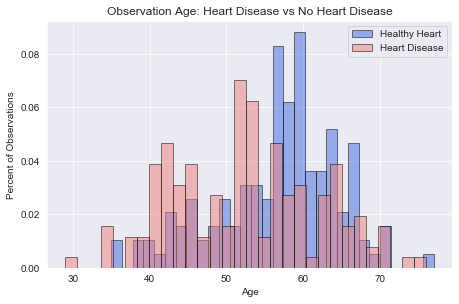

In [20]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Heart_Disease'] == 'Healthy Heart'].Age, label = 'Healthy Heart', 
         density = True, bins = 30, alpha = .50,edgecolor= 'black',color ='royalblue')

ax1.hist(df[df['Heart_Disease'] == 'Heart Disease'].Age, label = 'Heart Disease', 
         density = True, bins = 30, alpha = .50, edgecolor = 'black',color = 'lightcoral')

ax1.set_title('Observation Age: Heart Disease vs No Heart Disease')
ax1.set_xlabel('Age')
ax1.set_ylabel('Percent of Observations')
ax1.legend(loc = 'upper right')


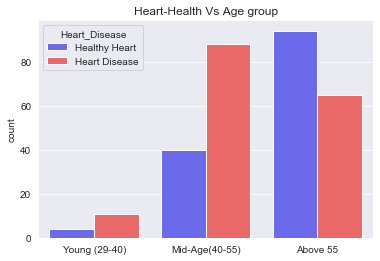

In [21]:
age_groups=[]
for i in df['Age']:
    if (i >= 29) & (i < 40):
        age_groups.append(0)
    elif (i >= 40)&(i < 55):
        age_groups.append(1)
    else:
        age_groups.append(2)
df['Age-Group'] = age_groups

plt.title("Heart-Health Vs Age group")
ax = sns.countplot(x=age_groups,hue='Heart_Disease',data=df.reset_index(),palette="seismic")
ax.set_xticklabels(['Young (29-40)','Mid-Age(40-55)','Above 55']);

Age notes:

--Seem to be observing a lot of people in the 50-65 range


--Interesting spike of Heart Disease case with 40-55 year olds

## Independant Variable 2: Gender

0 = Female
1 = Male

In [22]:
df.groupby(['Gender','Heart_Disease']).describe()
# A lot more Males observations
# Observed females have higher chance of Heart Disease

Age                                                  \
                      count       mean        std   min    25%   50%    75%   
Gender Heart_Disease                                                          
0      Healthy Heart   24.0  59.041667   4.964913  43.0  56.75  60.5  62.00   
       Heart Disease   72.0  54.555556  10.265337  34.0  46.00  54.0  63.25   
1      Healthy Heart  114.0  56.087719   8.385155  35.0  51.00  57.5  61.00   
       Heart Disease   92.0  51.043478   8.623904  29.0  44.00  52.0  57.00   

                           Chest_Pain            ... Target      Age-Group  \
                       max      count      mean  ...    75%  max     count   
Gender Heart_Disease                             ...                         
0      Healthy Heart  66.0       24.0  0.166667  ...    0.0  0.0      24.0   
       Heart Disease  76.0       72.0  1.333333  ...    1.0  1.0      72.0   
1      Healthy Heart  77.0      114.0  0.543860  ...    0.0  0.0     114.0   
       Heart Disease  70.0       92.0  1.402174  ...    1.0  1.0      92.0   

                                                                   
                          mean       std  min  25%  50%  75%  max  
Gender Heart_Disease                                               
0      Healthy Heart  1.916667  0.282330  1.0  2.0  2.0  2.0  2.0  
       Heart Disease  1.402778  0.620307  0.0  1.0  1.0  2.0  2.0  
1      Healthy Heart  1.596491  0.560014  0.0  1.0  2.0  2.0  2.0  
       Heart Disease  1.271739  0.576142  0.0  1.0  1.0  2.0  2.0  

[4 rows x 112 columns]

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

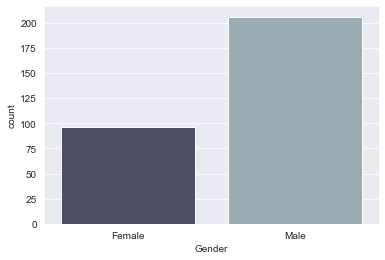

In [23]:
g = sns.countplot(x = 'Gender', data = df, palette = 'bone')
g.set_xticklabels(['Female','Male'])

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

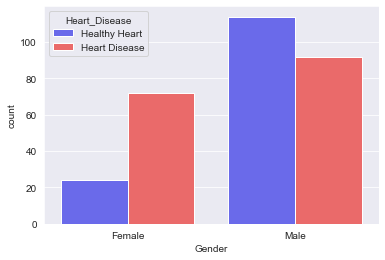

In [24]:
mf = sns.countplot(x='Gender',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
mf.set_xticklabels(['Female','Male'])

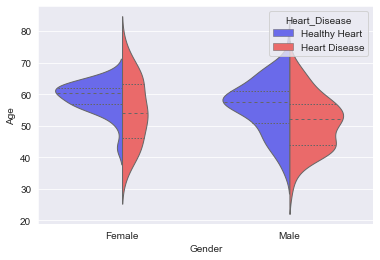

In [25]:
ag = sns.violinplot(data=df, x="Gender", y="Age", hue="Heart_Disease",
               split=True, inner="quart", linewidth=1,palette="seismic")
ag = ag.set_xticklabels(['Female','Male'])

# A lot of observations around 60 years old. Makes me think younger people only beign observed when showing symptoms

## Independant Variable 3: Chest Pain

In [26]:
##### Create Age Bins #####
bins = [-1,0,1,2,3]
labels = ['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
df['Chest_Pain_Type'] = pd.cut(df['Chest_Pain'], bins=bins, labels=labels)

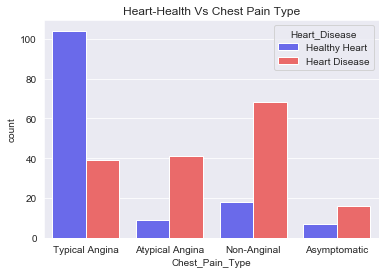

In [27]:
plt.title("Heart-Health Vs Chest Pain Type")
ax = sns.countplot(x='Chest_Pain_Type',hue="Heart_Disease",data=df.reset_index(),palette='seismic')

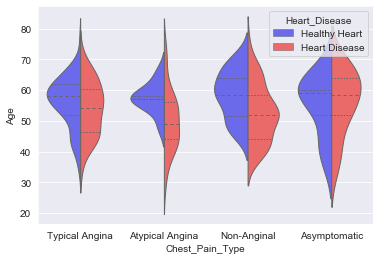

In [28]:
cp = sns.violinplot(data=df, x="Chest_Pain_Type", y="Age", hue="Heart_Disease",
               split=True, inner="quart", linewidth=1,palette="seismic")

## Independant Variable 4: Resting Blood Pressure

In [29]:
#High blood pressure is a systolic pressure of 130 or higher and below 130 is considred normal
#1 = High Blood Pressure
#0 = Normal

df['Blood_Pressure_Level'] = np.where(df['Resting_Blood_Pressure'] > 130, 1,0)

In [30]:
df.groupby(['Heart_Disease',])['Resting_Blood_Pressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
Heart Disease,164.0,129.250000,16.204739,94.0,120.0,130.0,140.00,180.0


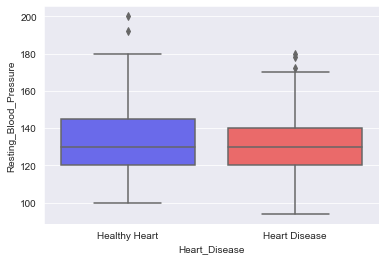

In [31]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Resting_Blood_Pressure",palette="seismic")

In [32]:
df[df['Resting_Blood_Pressure']>180]

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type,Blood_Pressure_Level
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,Healthy Heart,1,Atypical Angina,1
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,Healthy Heart,2,Typical Angina,1


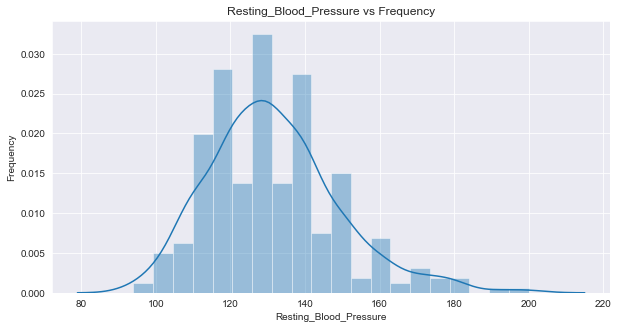

In [33]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df['Resting_Blood_Pressure'],kde=True, bins=20);
ax.set(xlabel='Resting_Blood_Pressure', ylabel='Frequency', title='Resting_Blood_Pressure vs Frequency');

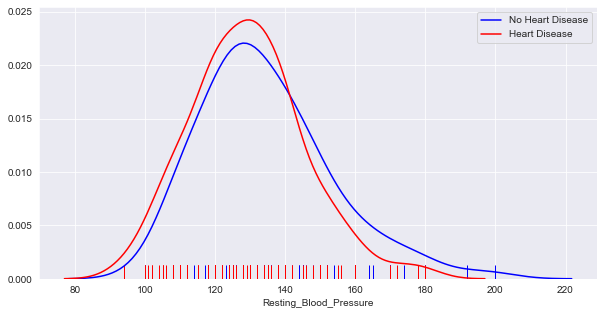

In [34]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Resting_Blood_Pressure, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Resting_Blood_Pressure, color='red',hist=False, rug=True, label = 'Heart Disease')

In [35]:
# Resting Blood Pressure doesnt seem to be very Telling of Heart Disease

## Independant Variable 5: Serum Cholesterol 

In [36]:
df.groupby(['Heart_Disease',])['Serum_Cholesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
Heart Disease,164.0,242.640244,53.456580,126.0,208.75,234.5,267.25,564.0


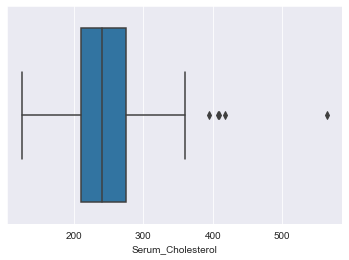

In [37]:
sns.boxplot(df.Serum_Cholesterol)

In [38]:
df[df['Serum_Cholesterol']>400]

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type,Blood_Pressure_Level
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,Heart Disease,2,Non-Anginal,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,Heart Disease,2,Non-Anginal,0
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,Healthy Heart,2,Typical Angina,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0,Healthy Heart,2,Typical Angina,1


In [39]:
# Healthy serum cholesterol is less than 200 mg/dL
df['Serum_Cholesterol_Level'] = np.where(df['Serum_Cholesterol'] > 200, 1,0)

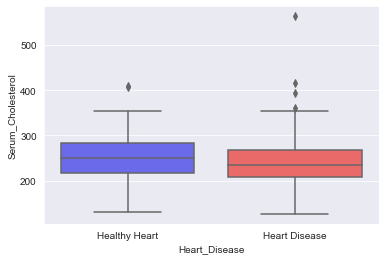

In [40]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Serum_Cholesterol",palette="seismic")

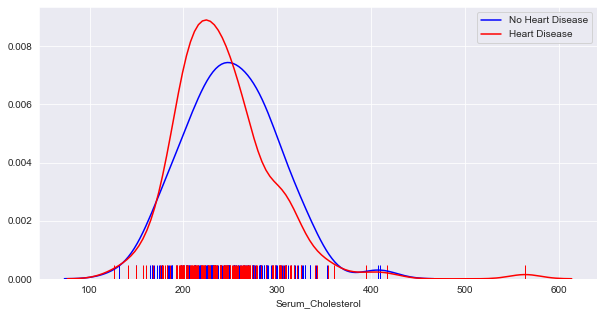

In [41]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Serum_Cholesterol, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Serum_Cholesterol, color='red',hist=False, rug=True, label = 'Heart Disease')

Text(0.5, 1.0, 'Resting Blood Pressure vs Serum Cholesterol')

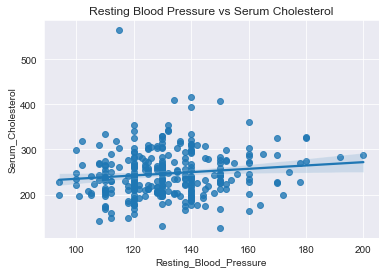

In [42]:
sns.regplot(x=df.Resting_Blood_Pressure,y=df.Serum_Cholesterol)
plt.title('Resting Blood Pressure vs Serum Cholesterol')

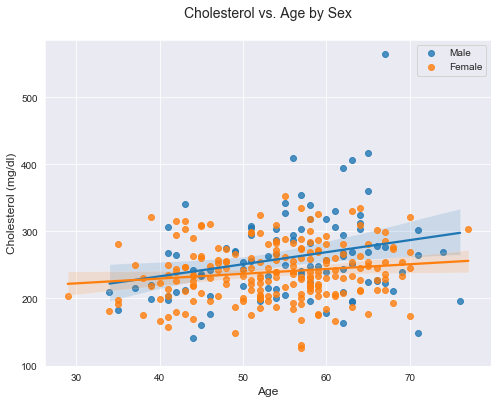

In [43]:
plt.figure(figsize=(8,6))
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 0], label='Male')
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 1], label='Female')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age by Sex\n', fontsize=14)
plt.legend();

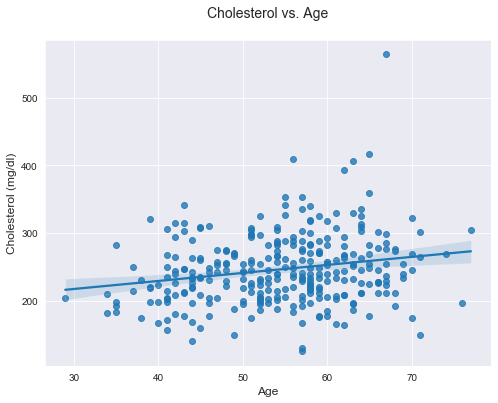

In [44]:
plt.figure(figsize=(8,6))
p = sns.regplot('Age', 'Serum_Cholesterol', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age\n', fontsize=14);

In [45]:
# We can say, based on this data, that both tend to have increase blood cholesterol levels with increases in age

## Independant Variable 5: Fasting Blood Pressure

In [46]:
#(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [47]:
df.groupby(['Heart_Disease'])['Fasting_Blood_Sugar'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,0.159420,0.367401,0.0,0.0,0.0,0.0,1.0
Heart Disease,164.0,0.140244,0.348303,0.0,0.0,0.0,0.0,1.0


[Text(0, 0, 'False'), Text(0, 0, 'True')]

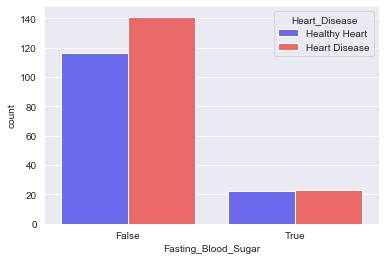

In [48]:
fbs = sns.countplot(x='Fasting_Blood_Sugar',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
fbs.set_xticklabels(['False','True'])

## Independent Variable 7: Resting ECG

-- resting electrocardiographic results

In [49]:
df.groupby(['Heart_Disease'])['Resting_ECG'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,0.449275,0.541321,0.0,0.0,0.0,1.0,2.0
Heart Disease,164.0,0.591463,0.505358,0.0,0.0,1.0,1.0,2.0


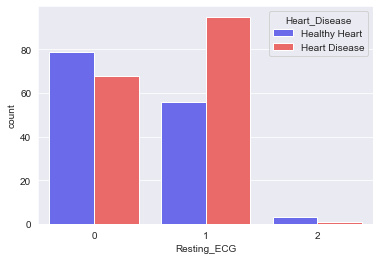

In [50]:
fbs = sns.countplot(x='Resting_ECG',hue="Heart_Disease",data=df.reset_index(),palette='seismic')


## Independent Variable 8: Max_Heart_Rate

In [51]:
df

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type,Blood_Pressure_Level,Serum_Cholesterol_Level
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Healthy Heart,1,Typical Angina,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Healthy Heart,1,Typical Angina,1,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Healthy Heart,2,Typical Angina,1,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Healthy Heart,2,Typical Angina,1,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Healthy Heart,2,Typical Angina,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,Heart Disease,2,Non-Anginal,0,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,Heart Disease,1,Non-Anginal,0,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,Healthy Heart,1,Typical Angina,0,1
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,Healthy Heart,2,Asymptomatic,1,1


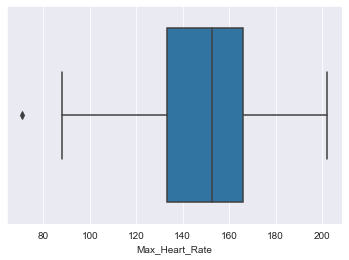

In [52]:
sns.boxplot(df.Max_Heart_Rate)

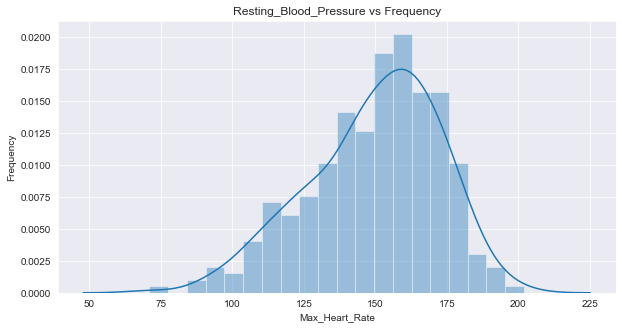

In [53]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df['Max_Heart_Rate'],kde=True, bins=20);
ax.set(xlabel='Max_Heart_Rate', ylabel='Frequency', title='Resting_Blood_Pressure vs Frequency');

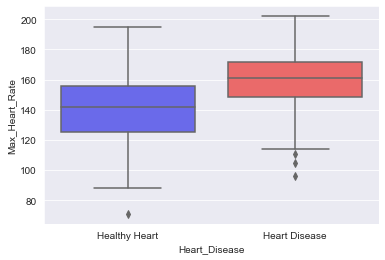

In [54]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Max_Heart_Rate",palette="seismic")

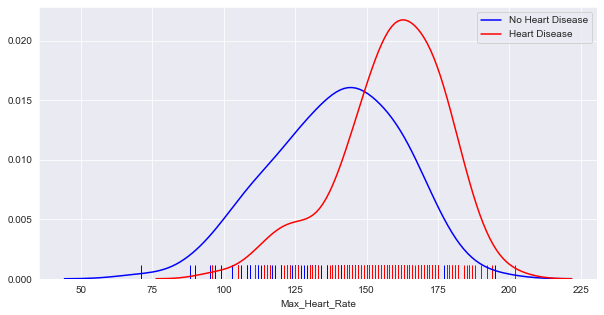

In [55]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Max_Heart_Rate, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Max_Heart_Rate, color='red',hist=False, rug=True, label = 'Heart Disease')

Null Hypothesis: Max Heart Rate is the same in patients with Heart Disease and Without Heart Disease


Alternative Hypothesis: Max Heart Rate is greater in patients with Heart Disease

In [56]:
import scipy.stats as stats
from scipy.stats import ttest_ind

mhr_hh = df[df['Target']==0].Max_Heart_Rate
mhr_nhh = df[df['Target']==1].Max_Heart_Rate

mhr_hh.shape, mhr_nhh.shape

((138,), (164,))

In [57]:
print(ttest_ind(mhr_hh, mhr_nhh))
ttest_ind(mhr_hh, mhr_nhh)[1]/2

Ttest_indResult(statistic=-8.014848252140112, pvalue=2.4761460479234722e-14)


1.2380730239617361e-14

Reject the Null Hypothesis

## Independent Variable 9: Exercise_Indused_Angina

---exercise induced angina (0 = no, 1 = yes)

In [58]:
df.groupby(['Heart_Disease'])['Exercise_Indused_Angina'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,0.550725,0.499232,0.0,0.0,1.0,1.0,1.0
Heart Disease,164.0,0.140244,0.348303,0.0,0.0,0.0,0.0,1.0


[Text(0, 0, 'False'), Text(0, 0, 'True')]

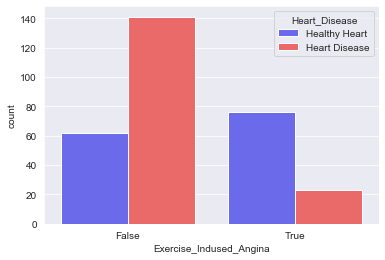

In [59]:
eia = sns.countplot(x='Exercise_Indused_Angina',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
eia.set_xticklabels(['False','True'])

## Independent Variable 10: Oldpeak

---ST depression induced by exercise relative to rest

In [60]:
df.groupby(['Heart_Disease'])['Oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,1.585507,1.300340,0.0,0.6,1.4,2.500,6.2
Heart Disease,164.0,0.586585,0.781734,0.0,0.0,0.2,1.025,4.2


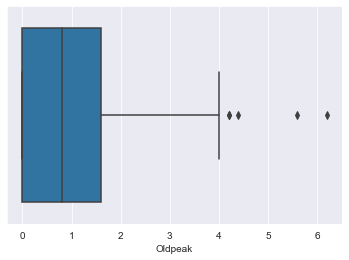

In [61]:
sns.boxplot(df.Oldpeak)

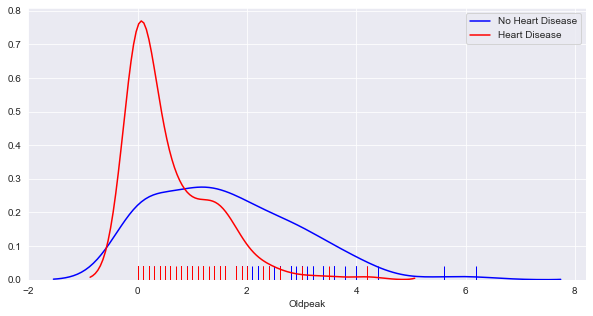

In [62]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Oldpeak, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Oldpeak, color='red',hist=False, rug=True, label = 'Heart Disease')

## Independent Variable 11: Slope

---the slope of the peak exercise ST segment

upsloping, flat, downsloping

In [63]:
df.groupby(['Heart_Disease'])['Slope'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,1.166667,0.561324,0.0,1.0,1.0,1.75,2.0
Heart Disease,164.0,1.591463,0.594598,0.0,1.0,2.0,2.00,2.0


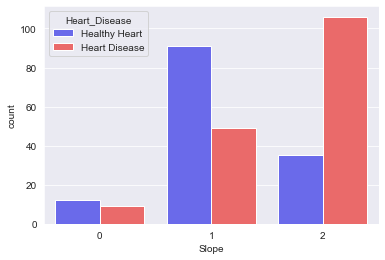

In [64]:
s = sns.countplot(x='Slope',hue="Heart_Disease",data=df.reset_index(),palette='seismic')

## Independent Variable 12: Major_Vessels
---number of major vessels (0-3)

Fluoroscopy is used to help the healthcare provider see the flow of blood through the coronary arteries to check for arterial blockages.

Fluoroscopy is a study of moving body structures. It’s much like an X-ray "movie" and is often done while a contrast dye moves through the part of the body being examined. A continuous X-ray beam is passed through the body part and sent to a video monitor so that the body part and its motion can be seen in detail. Fluoroscopy, as an imaging tool, allows healthcare providers to look at many body systems, including the skeletal, digestive, urinary, cardiovascular, respiratory, and reproductive systems.

Fluoroscopy may be used to evaluate specific areas of the body. These include the bones, bowel, muscles, heart vessels, and joints.

If both age and the number of vessels calcified are considered, fluoroscopy can provide useful information regarding the presence of stenosis in young and middle-aged patients.

Vascular calcifications are mineral deposits on the walls of your arteries and veins. These mineral deposits sometimes stick to fatty deposits, or plaques, that are already built up on the walls of a blood vessel. Vascular calcifications are common but potentially serious.

In [65]:
df.groupby(['Heart_Disease'])['Major_Vessels'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,1.166667,1.043460,0.0,0.0,1.0,2.0,4.0
Heart Disease,164.0,0.341463,0.802137,0.0,0.0,0.0,0.0,4.0


In [66]:
df.groupby(['Heart_Disease'])['Major_Vessels'].value_counts()

Heart_Disease  Major_Vessels
Healthy Heart  0                 45
               1                 44
               2                 31
               3                 17
               4                  1
Heart Disease  0                130
               1                 21
               2                  7
               3                  3
               4                  3
Name: Major_Vessels, dtype: int64

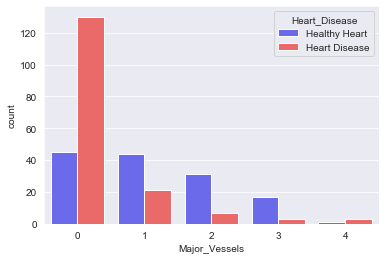

In [67]:
sns.countplot(x='Major_Vessels',hue="Heart_Disease",data=df.reset_index(),palette='seismic')

## Independent Variable 13: Thalassemia
---(3 = normal; 6 = fixed defect; 7 = reversable defect)

In [68]:
df.groupby(['Heart_Disease'])['Thalassemia'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,2.543478,0.684762,0.0,2.0,3.0,3.0,3.0
Heart Disease,164.0,2.121951,0.467082,0.0,2.0,2.0,2.0,3.0


In [69]:
df.groupby(['Heart_Disease'])['Thalassemia'].value_counts()

Heart_Disease  Thalassemia
Healthy Heart  3               89
               2               36
               1               12
               0                1
Heart Disease  2              129
               3               28
               1                6
               0                1
Name: Thalassemia, dtype: int64

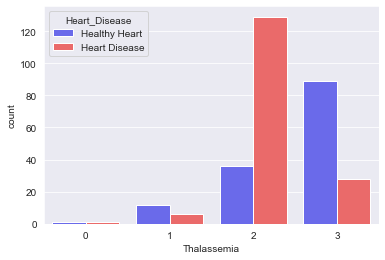

In [70]:
sns.countplot(x='Thalassemia',hue="Heart_Disease",data=df.reset_index(),palette='seismic')

# Feature Engineering

In [71]:
df.drop(columns=['Age-Group','Chest_Pain', 'Heart_Disease','Blood_Pressure_Level'],inplace=True)

In [72]:
df

,Age,Gender,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Chest_Pain_Type,Serum_Cholesterol_Level
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,Typical Angina,1
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,Typical Angina,1
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,Typical Angina,0
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,Typical Angina,1
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,Typical Angina,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,0,115,0,1.5,1,0,2,1,Non-Anginal,1
733,44,0,108,141,0,1,175,0,0.6,1,0,2,1,Non-Anginal,0
739,52,1,128,255,0,1,161,1,0.0,2,1,3,0,Typical Angina,1
843,59,1,160,273,0,0,125,0,0.0,2,0,2,0,Asymptomatic,1


In [73]:
##### Create Age Bins #####
bins = [0,40,55,100]
labels = ['young','middle','old']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
##### Get Dummies #####
df = pd.get_dummies(df, columns = ['Age'], drop_first= True)

In [74]:
##### Creat Dummies for Resting_ECG #####
df = pd.get_dummies(df, columns = ['Resting_ECG'], drop_first= True)

In [75]:
##### Create binary values for "High Oldpeak" (<2) and "Low Oldpeak" (>=2) #####
df['Oldpeak'] = np.where(df['Oldpeak'] > 2, 1,0)

In [76]:
##### Creat Dummies for Resting_ECG #####
df = pd.get_dummies(df, columns = ['Slope'], drop_first= True)

In [77]:
##### Creat Dummies for Major_Vessels #####
df = pd.get_dummies(df, columns = ['Major_Vessels'], drop_first= True)

In [78]:
##### Creat Dummies for Thalassemia #####
df = pd.get_dummies(df, columns = ['Thalassemia'], drop_first= True)

In [79]:
##### Creat Dummies for Chest_Pain_Type #####
df = pd.get_dummies(df, columns = ['Chest_Pain_Type'], drop_first= True)

In [148]:
df.nunique()

Gender                               2
Resting_Blood_Pressure              49
Serum_Cholesterol                  152
Fasting_Blood_Sugar                  2
Max_Heart_Rate                      91
Exercise_Indused_Angina              2
Oldpeak                              2
Target                               2
Serum_Cholesterol_Level              2
Age_middle                           2
Age_old                              2
Resting_ECG_1                        2
Resting_ECG_2                        2
Slope_1                              2
Slope_2                              2
Major_Vessels_1                      2
Major_Vessels_2                      2
Major_Vessels_3                      2
Major_Vessels_4                      2
Thalassemia_1                        2
Thalassemia_2                        2
Thalassemia_3                        2
Chest_Pain_Type_Atypical Angina      2
Chest_Pain_Type_Non-Anginal          2
Chest_Pain_Type_Asymptomatic         2
dtype: int64

# Feature Selection

In [81]:
for colname in df.columns:
    df[colname] = df[colname].astype(float)

In [82]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Target', axis=1) # grabs everything else but 'Default'

# Create target variable
y = df['Target'] # y is the column we're trying to predict

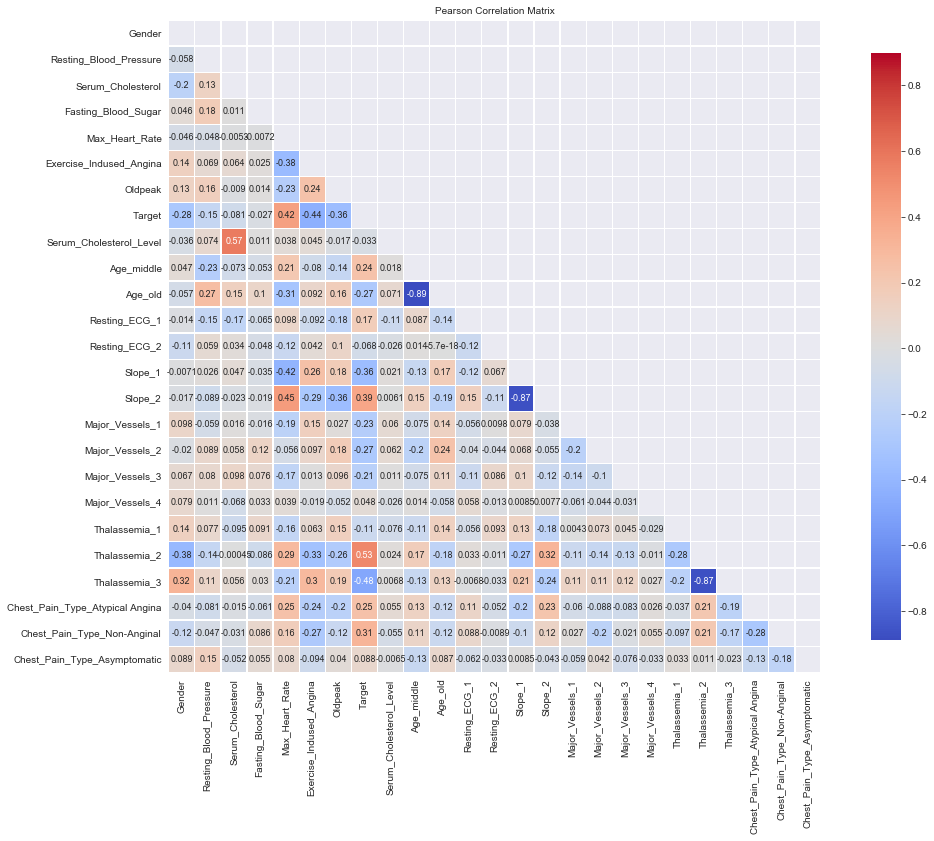

In [151]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

In [84]:
corrs_dict={}
for col in X.columns:
    corr=y.corr(X[col])
    corrs_dict[corr]=col

In [85]:
sorted(corrs_dict.items(),reverse=True)

[(0.5260296712540145, 'Thalassemia_2'),
 (0.4199550436638699, 'Max_Heart_Rate'),
 (0.39212098451105937, 'Slope_2'),
 (0.3136956289926139, 'Chest_Pain_Type_Non-Anginal'),
 (0.2476494048918161, 'Chest_Pain_Type_Atypical Angina'),
 (0.23800269081918843, 'Age_middle'),
 (0.17282711516308885, 'Resting_ECG_1'),
 (0.08795861420425954, 'Chest_Pain_Type_Asymptomatic'),
 (0.04813272102108149, 'Major_Vessels_4'),
 (-0.026825970565970074, 'Fasting_Blood_Sugar'),
 (-0.03304360782631137, 'Serum_Cholesterol_Level'),
 (-0.06815593296585133, 'Resting_ECG_2'),
 (-0.08143720051844137, 'Serum_Cholesterol'),
 (-0.10598586814646645, 'Thalassemia_1'),
 (-0.14626866384155432, 'Resting_Blood_Pressure'),
 (-0.2101259526429759, 'Major_Vessels_3'),
 (-0.23125456761608315, 'Major_Vessels_1'),
 (-0.26588786948167514, 'Age_old'),
 (-0.2732946394667862, 'Major_Vessels_2'),
 (-0.2836093577958622, 'Gender'),
 (-0.36025797049575103, 'Slope_1'),
 (-0.36040035346044913, 'Oldpeak'),
 (-0.4356007617136186, 'Exercise_Indused

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif['Features'] = X.columns
    return vif
Vif = vif_(X)

In [87]:
Vif.sort_values('VIF',ascending=False)[:5]

,VIF,Features
4,60.825737,Max_Heart_Rate
1,57.989664,Resting_Blood_Pressure
19,52.644254,Thalassemia_2
20,39.536536,Thalassemia_3
2,39.173033,Serum_Cholesterol


In [149]:
df.to_csv('final_df.csv')

# Modeling

## Splitting and Scaling

In [88]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=20)

In [89]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

241
61
241
61


In [90]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train, columns = X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data = X_test,columns = X.columns)

## Logistic Regression 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(X_train, y_train)

base_logred_train_pred = logreg.predict(X_train)
base_logred_test_pred = logreg.predict(X_test)


base_logreg_recall = metrics.recall_score(y_test, base_logred_test_pred)
base_logred_train_f1_score = f1_score(y_train, base_logred_train_pred)
base_logreg_test_f1_score = f1_score(y_test, base_logred_test_pred)


print('Recall Score: ', base_logreg_recall)
print('Train F1 score: ', base_logred_train_f1_score)
print('Test F1 score: ', base_logreg_test_f1_score)

Recall Score:  0.9117647058823529
Train F1 score:  0.9125475285171102
Test F1 score:  0.8857142857142858


## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

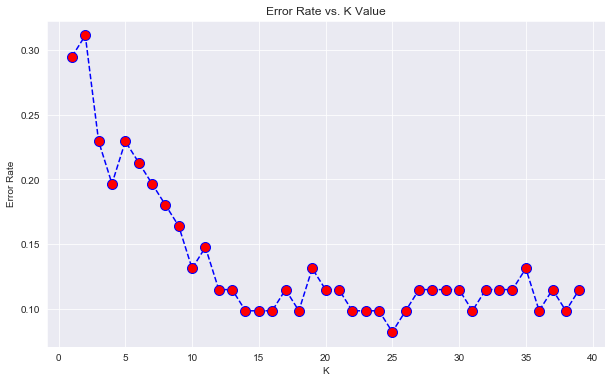

In [93]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [94]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNN_preds = knn.predict(X_test)

In [150]:
KNN_recall = metrics.recall_score(y_test, KNN_preds)
KNN_f1_score = f1_score(y_test, KNN_preds)


print('Recall Score: ', KNN_recall)
print('Test F1 score: ', KNN_f1_score)

Recall Score:  0.9117647058823529
Test F1 score:  0.8157894736842106


In [96]:
print('KNN Classification Report')
print(classification_report(y_test,KNN_preds))

KNN Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.59      0.70        27
         1.0       0.74      0.91      0.82        34

    accuracy                           0.77        61
   macro avg       0.79      0.75      0.76        61
weighted avg       0.78      0.77      0.76        61



## Decision Tree

In [97]:
# Simple decision tree (ID3)
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

f1_train = round(f1_score(y_train, y_pred_train), 3)
f1_test = round(f1_score(y_test, y_pred), 3)

print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train F1 score:  1.0
Test F1 score:  0.677


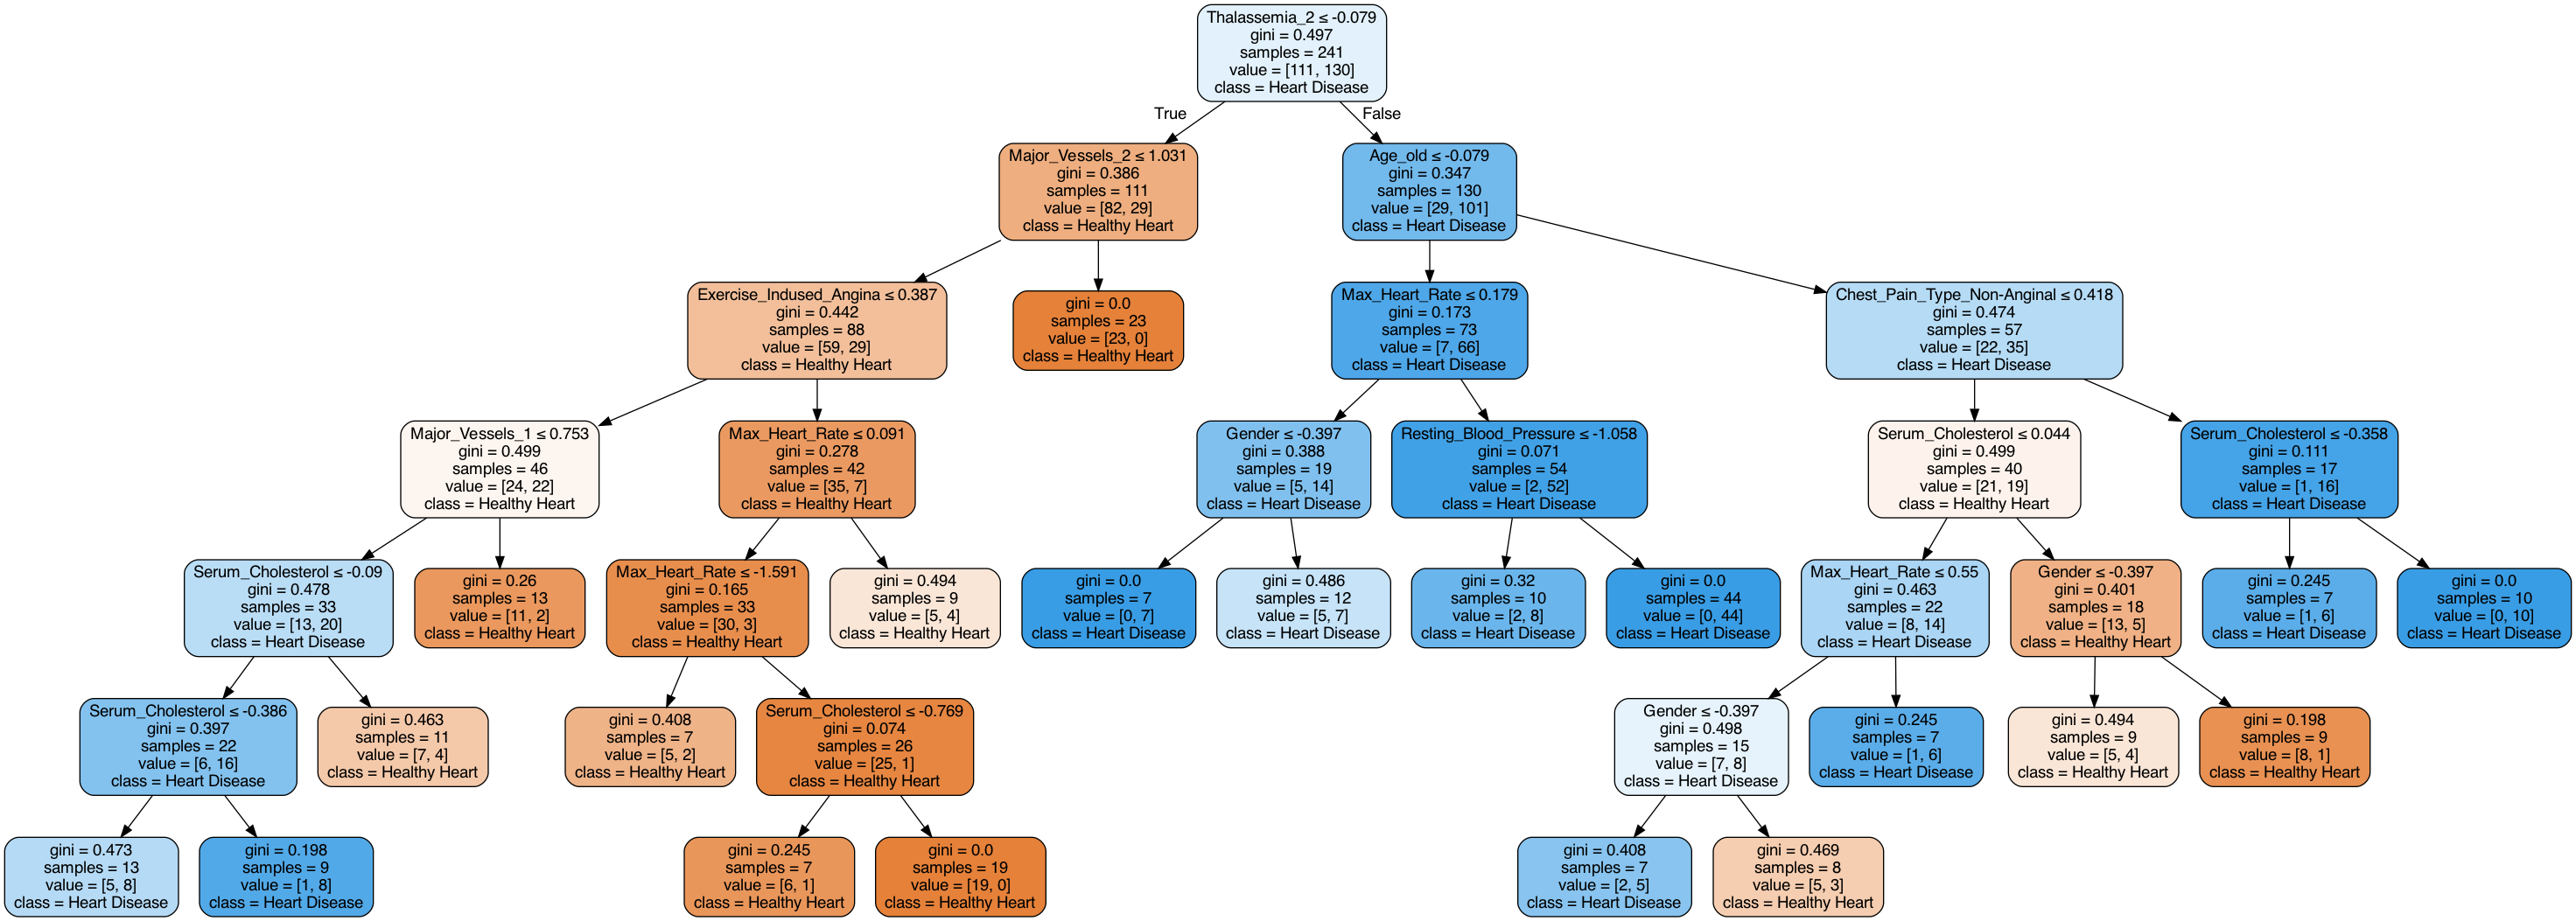

In [98]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dtc = DecisionTreeClassifier(random_state=1, criterion = 'gini', max_depth = 7, min_samples_leaf = 7, min_samples_split = 2)
dtc.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['Healthy Heart','Heart Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

[0.04296864 0.0688188  0.06888179 0.01908709 0.0781731  0.07623897
 0.04533387 0.01606534 0.02418293 0.03086118 0.03673953 0.00247434
 0.04344546 0.04629941 0.04708351 0.0333217  0.0234066  0.00232426
 0.00831898 0.1027562  0.08231756 0.02449462 0.04943401 0.02697212]


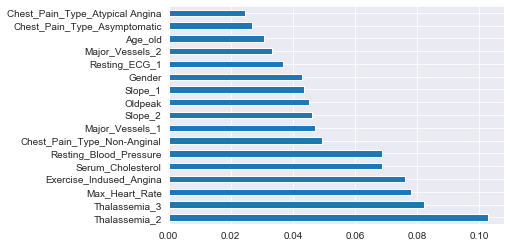

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [100]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(C=1e9)
#logreg.fit(x_train, y_train)
#log_pred = logreg.predict(x_test_s)

### Using KNN Model

In [101]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.08196721311475409 at K = 24


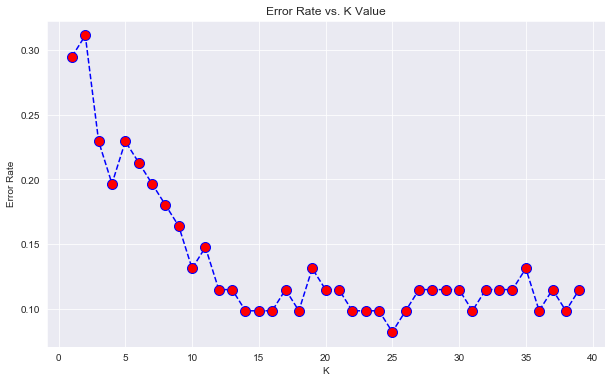

In [102]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

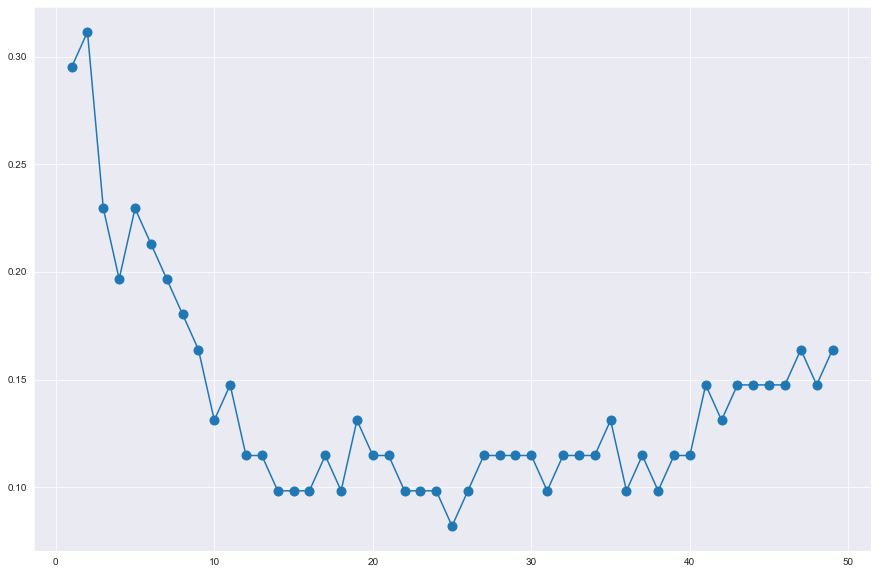

In [103]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

Maximum accuracy:- 0.9180327868852459 at K = 24


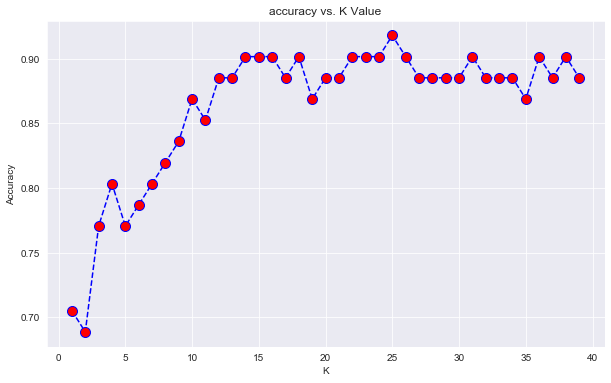

In [104]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [105]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [106]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [107]:
knn_predicted = knn.predict(X_test)

In [108]:
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [109]:
knn_predicted

array([0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0.])

In [110]:
knn_acc_score

0.8032786885245902

In [111]:
y_pred_class = knn.predict(X_test)

In [112]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:0.8032786885245902


In [113]:
knn_y_pred_class = knn.predict(X_test)

In [114]:
print(metrics.recall_score(y_test, knn_y_pred_class))

0.8823529411764706


In [115]:
model_1 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [116]:
print("confussion matrix")
print(knn_conf_matrix)

confussion matrix
[[21  6]
 [13 21]]


In [117]:
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')

Accuracy of K-NeighborsClassifier: 68.85245901639344 



In [118]:
print(classification_report(y_test,knn_predicted))

              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69        27
         1.0       0.78      0.62      0.69        34

    accuracy                           0.69        61
   macro avg       0.70      0.70      0.69        61
weighted avg       0.71      0.69      0.69        61



### Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)

In [121]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [122]:
rfc_predicted = rfc.predict(X_test)

In [123]:
rfc_acc_score = accuracy_score(y_test, rfc_predicted)

In [124]:
rfc_predicted

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [125]:
rfc_acc_score

0.8688524590163934

In [126]:
model_2 = 'Random Forest Classfier'
rfc = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rfc.fit(X_train,y_train)
rfc_predicted = rfc.predict(X_test)
rfc_conf_matrix = confusion_matrix(y_test, rfc_predicted)
rfc_acc_score = accuracy_score(y_test, rfc_predicted)

In [127]:
print("confussion matrix")
print(rfc_conf_matrix)

confussion matrix
[[22  5]
 [ 3 31]]


In [128]:
print("Accuracy of Random Forest:",rfc_acc_score*100,'\n')
print(classification_report(y_test,rfc_predicted))

Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85        27
         1.0       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [131]:
lr = LogisticRegression()

In [132]:
lr.fit(X_train,y_train)

LogisticRegression()

In [133]:
lr_predict = lr.predict(X_test)

In [134]:
lr_acc_score = accuracy_score(y_test, lr_predict)

In [135]:
lr_predict

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [136]:
lr_acc_score

0.8688524590163934

In [137]:
model_3 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

In [138]:
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[22  5]
 [ 3 31]]


In [139]:
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Accuracy of Logistic Regression: 86.88524590163934 

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85        27
         1.0       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [140]:
lr_y_pred_class = lr.predict(X_test)

In [141]:
print(metrics.recall_score(y_test, lr_y_pred_class))

0.9117647058823529


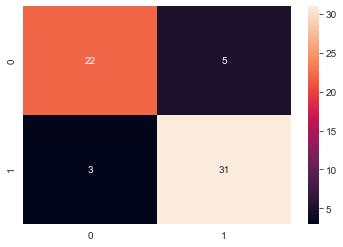

In [142]:
cm = confusion_matrix(y_test,lr_predict)
sns.heatmap(cm,annot=True);

###  Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
model_4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

In [145]:
print("confussion matrix")
print(dt_conf_matrix)

confussion matrix
[[18  9]
 [ 9 25]]


In [146]:
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 70.49180327868852 



In [147]:
print(classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        27
         1.0       0.74      0.74      0.74        34

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

